# MARTÍN COGO

# Linear Regression VS Linear Neuronal Network for Regression


## Contenido
  - Exploración de los datos
  - Solución mediante método de RSE Regresión Lineal
  - Solución mediante Multiple Layer Perceptron (MLP)

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib as mpt

In [4]:
df = pd.read_csv('./train.csv', index_col="id")
df

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
id,,,,,,,,,,,,,,,,,,,,,
6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,NYC,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,LA,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,NYC,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0


In [5]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [6]:
df[:1]

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
id,,,,,,,,,,,,,,,,,,,,,
6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0


In [7]:
df.shape

(74111, 28)

### Price distribution

In [8]:
prices = df[['log_price']]
prices

,log_price
id,
6901257,5.010635
6304928,5.129899
7919400,4.976734
13418779,6.620073
3808709,4.744932
...,...
14549287,4.605170
13281809,5.043425
18688039,5.220356


## Histograma
Realizamos un histograma para ver la distribución de los precios.

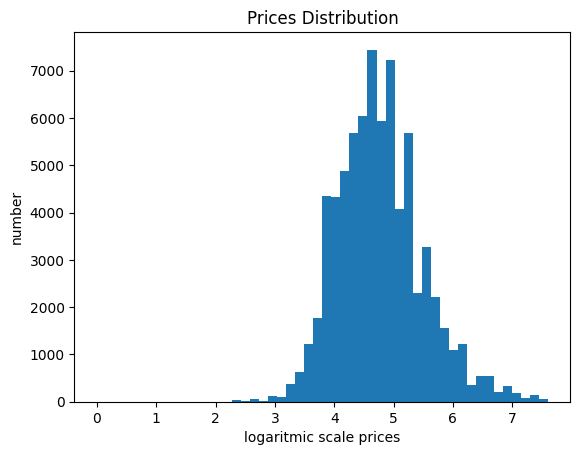

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.hist(prices, bins=50)
plt.title("Prices Distribution")
plt.xlabel("logaritmic scale prices")
plt.ylabel("number")
plt.show()
plt.show()

Mapeamos la latitud y longitud para preciar cual es la distribución de las casas

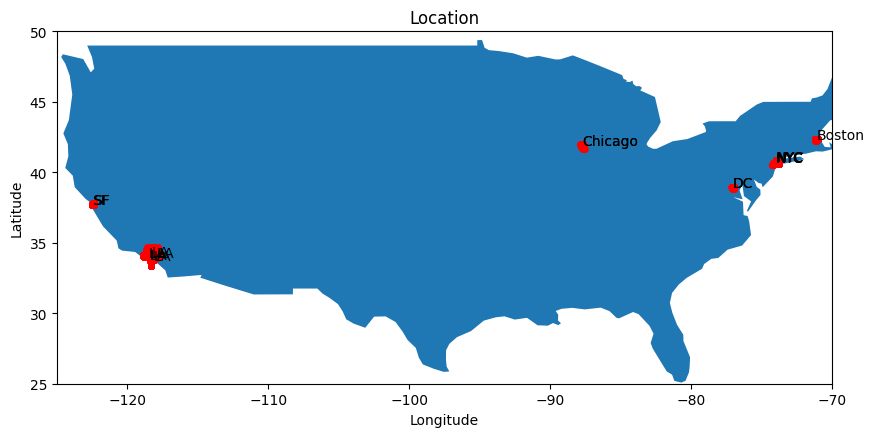

In [10]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

world = gpd.read_file(
    "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")

fig, ax = plt.subplots(figsize=(10, 6))

geometry = [
    Point(xy) for xy in zip(df['longitude'], df['latitude'])
]


gdf = GeoDataFrame(df, geometry=geometry)
GeoDataFrame(world.loc[4, :]).T["geometry"].plot(ax=ax)
ax.set_xlim(-125, -70)
ax.set_ylim(25, 50)

gdf.plot(ax=ax, marker='o', color='red', markersize=15)

for idx, row in df[:18].iterrows():
    ax.annotate(row['city'], (row['longitude'], row['latitude']))

plt.title("Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Distribución de number_of_reviews 

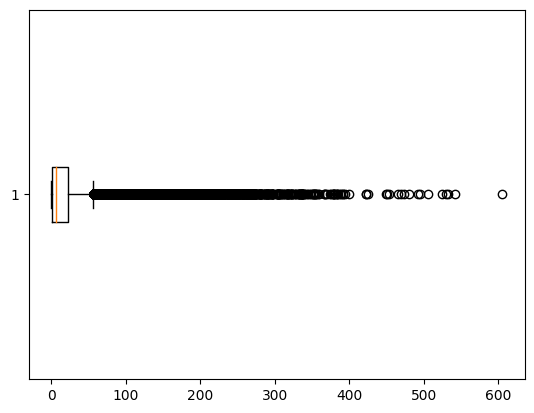

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb
#plt.hist(df['number_of_reviews'].value_counts(), bins=50)
plt.boxplot(df['number_of_reviews'],vert=False)
plt.show()

In [12]:
df[df['number_of_reviews']>100].shape[0] / df.shape[0]

0.045458838768873716

Como solo el $6$% de los valores son atípicos mayores a 100 entonces simplemente los descartaré para evitar que todos esos valores atípicos causen una divergencia en el modelo.

In [13]:
df = df.drop(labels=df[df['number_of_reviews']>100].index,axis=0)

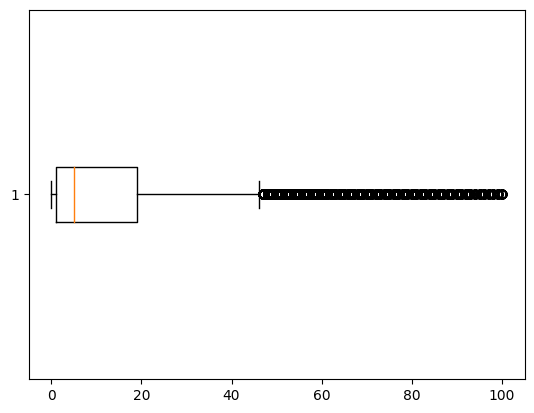

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb
#plt.hist(df['number_of_reviews'].value_counts(), bins=50)
plt.boxplot(df['number_of_reviews'],vert=False)
plt.show()

## Feature selection

- Voy a quitar las siguientes Features:  

 |           Feature|Razón                                       |  
 |------------------|--------------------------------------------|  
 |Latitud y Longitud|Ya tenemos el nombre de la ciudad           |
 |Descripción|Al ser textos tan diferentes no es fácil de trabajar en regression|  
 |first_review|Es texto|  
 |thumbnail_url|Son URL que no tienen relación con el precio|  
 |zipcode|Es un código postal, al ya tener las ciudades no creo que sea importante|  
 |name|Son todos nombre únicos que no influencian el precio|  
 -----

In [15]:
df = df.drop(columns=['latitude', 'longitude', 'description',
             'first_review', 'thumbnail_url', 'zipcode', 'name'])
df.shape

(70742, 21)

## Eliminar filas con campos NaN

Prácticamente el 40% de las filas del dataset tienen algún campo completado con NaN. Como se trata de muchas filas, decidí que eliminaré la menor cantidad posible.

In [16]:
filas_con_nan = df.isna().any(axis=1)
cantNan = filas_con_nan.sum()

In [17]:
# Porcentaje de filas que tienen almeno un NaN
cantNan / df.shape[0]

0.4353707839755732

In [18]:
df.isna().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   183
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic        181
host_identity_verified      181
host_response_rate        18266
host_since                  181
instant_bookable              0
last_review               15827
neighbourhood              6707
number_of_reviews             0
review_scores_rating      16720
bedrooms                     84
beds                        131
dtype: int64

Features que pueden admitir un valor por defecto:
- bathrooms : 0
- host_has_profile_pic: False
- host_identity_verified: False
- host_response_rate: 0
- review_scores_rating: 0
- bedrooms: 0
- beds: 0

Las Features con Nan que no voy a especular son:
- host_since
- last_review
- neighborhood

In [19]:
df.loc[df["bathrooms"].isna(), "bathrooms"] = 0
df.loc[df["host_has_profile_pic"].isna(), "host_has_profile_pic"] = 'f'
df.loc[df["host_identity_verified"].isna(), "host_identity_verified"] = 'f'
df.loc[df["host_response_rate"].isna(), "host_response_rate"] = 0
df.loc[df["review_scores_rating"].isna(), "review_scores_rating"] = 0
df.loc[df["bedrooms"].isna(), "bedrooms"] = 0
df.loc[df["beds"].isna(), "beds"] = 0

In [20]:
filas_con_nan = df.isna().any(axis=1)
cantNan = filas_con_nan.sum()
cantNan / df.shape[0]

0.29558112578100704

Pudimos bajar casi un 10% la cantidad de filas con NaN en sus campos.
Ahora eliminaremos los que quedan.

In [21]:
df = df.dropna()
df.shape

(49832, 21)

# Normalización de Features

In [22]:
# Variable Numerica
df[['accommodates', 'number_of_reviews', 'bedrooms', 'beds', 'bathrooms']] = df[[
    'accommodates', 'number_of_reviews', 'bedrooms', 'beds', 'bathrooms']].astype(int)

# Normalizar Variables entre 0 y 1.
df = df.drop(columns=[],axis=1)
df['host_response_rate'] = df['host_response_rate'].apply(lambda x: int(str(x).strip("%"))/100).astype(int)

max_val = float(df['review_scores_rating'].max())
min_val = float(df['review_scores_rating'].min())
df['review_scores_rating'] = ((0.99 - 0.01) * (df['review_scores_rating'] - min_val) / (max_val - min_val)) + 0.01

# Categóricos Ordinales a Numérica
df['cancellation_policy'] = df['cancellation_policy'].replace({
    'flexible': 0,
    'moderate': 1,
    'strict': 2,
    'super_strict_30': 3,
    'super_strict_60': 4
})

# Varaibles Date a Ordinal
df['host_since'] = (pd.to_numeric(pd.to_datetime(
    df['host_since'])) / pow(10, 19))

df['last_review'] = (pd.to_numeric(pd.to_datetime(
    df['last_review'])) / pow(10, 19))

# Normalizar Booleanos a Numerica
df = df.replace({
    False: 0,
    True: 1
})

# Normalizar a True o False y luego a Numérica
df[['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']] = df[[
    'host_has_profile_pic',
    'host_identity_verified',
    'instant_bookable'
]].replace({'f': 0, 't': 1})


In [23]:
# Varaible categoricas Nominales a Numerical

cat_vars = ['property_type','room_type','bed_type','city','neighbourhood']
onehot_ecoded = pd.get_dummies(df[cat_vars],columns=cat_vars)
onehot_ecoded = onehot_ecoded.replace({False: 0, True: 1})
df = pd.concat([df,onehot_ecoded],axis=1)
df = df.drop(columns=cat_vars)

In [24]:
df

,log_price,amenities,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,...,neighbourhood_Windsor Terrace,neighbourhood_Winnetka,neighbourhood_Woodhaven,neighbourhood_Woodland,neighbourhood_Woodland Hills/Warner Center,neighbourhood_Woodlawn,neighbourhood_Woodley Park,neighbourhood_Woodridge,neighbourhood_Woodside,neighbourhood_Wrigleyville
id,,,,,,,,,,,,,,,,,,,,,
6901257,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1,2,1,1,1,0,0.133272,...,0,0,0,0,0,0,0,0,0,0
6304928,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1,2,1,1,0,1,0.149783,...,0,0,0,0,0,0,0,0,0,0
7919400,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1,1,1,1,1,1,0.147735,...,0,0,0,0,0,0,0,0,0,0
3808709,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1,1,1,1,1,1,0.142517,...,0,0,0,0,0,0,0,0,0,0
12422935,4.442651,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1,2,1,1,1,1,0.149679,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13862304,4.605170,"{Internet,""Wireless Internet"",""Air conditionin...",2,1,2,1,1,1,1,0.132935,...,0,0,0,0,0,0,0,0,0,0
7935934,4.110874,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",10,3,0,0,1,0,1,0.137264,...,0,0,0,0,0,0,0,0,0,0
11829011,5.135798,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1,1,1,1,0,1,0.131700,...,0,0,0,0,0,0,0,0,0,0


In [25]:
onehot_ecoded

,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Cave,property_type_Chalet,...,neighbourhood_Windsor Terrace,neighbourhood_Winnetka,neighbourhood_Woodhaven,neighbourhood_Woodland,neighbourhood_Woodland Hills/Warner Center,neighbourhood_Woodlawn,neighbourhood_Woodley Park,neighbourhood_Woodridge,neighbourhood_Woodside,neighbourhood_Wrigleyville
id,,,,,,,,,,,,,,,,,,,,,
6901257,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6304928,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7919400,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3808709,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12422935,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13862304,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7935934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11829011,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Amenities manual onehot enconding
Las amenities son un conjunto de etiquetas que se le asignan a cada casa o departamento que lo describen. Como creo que tienen una fuerte influencia en el precio he decidido hacer un one-hot encoding para poder trabajarlas numéricamente. Esto resultara en una mayor cantidad de Features.

In [26]:
# Funciones para "escanear" las etiquetas
def cleanElement(L):
    for i in range(0, len(L)):
        L[i] = L[i].strip(" ").strip("\"\"")
    return L


def toList(amenities):
    l = amenities.strip("{}").strip(" ").split(",")
    return l


categories = df["amenities"].apply(toList)

# Obtener un conjunto de las etiquetas
allCategories = set()
for category in categories.items():
    allCategories.update(set(category[1]))
allCategories.discard('')

In [27]:
catdf = pd.DataFrame()
for cat in list(allCategories):
    catdf = pd.concat([catdf, categories.apply(
        lambda x: x.count(cat)).rename(cat)], axis=1)
catdf.shape

(49832, 130)

In [28]:
df = df.drop(columns=['amenities'])
catdf = pd.concat([df["log_price"],catdf],axis=1)

## heatmap para correlación

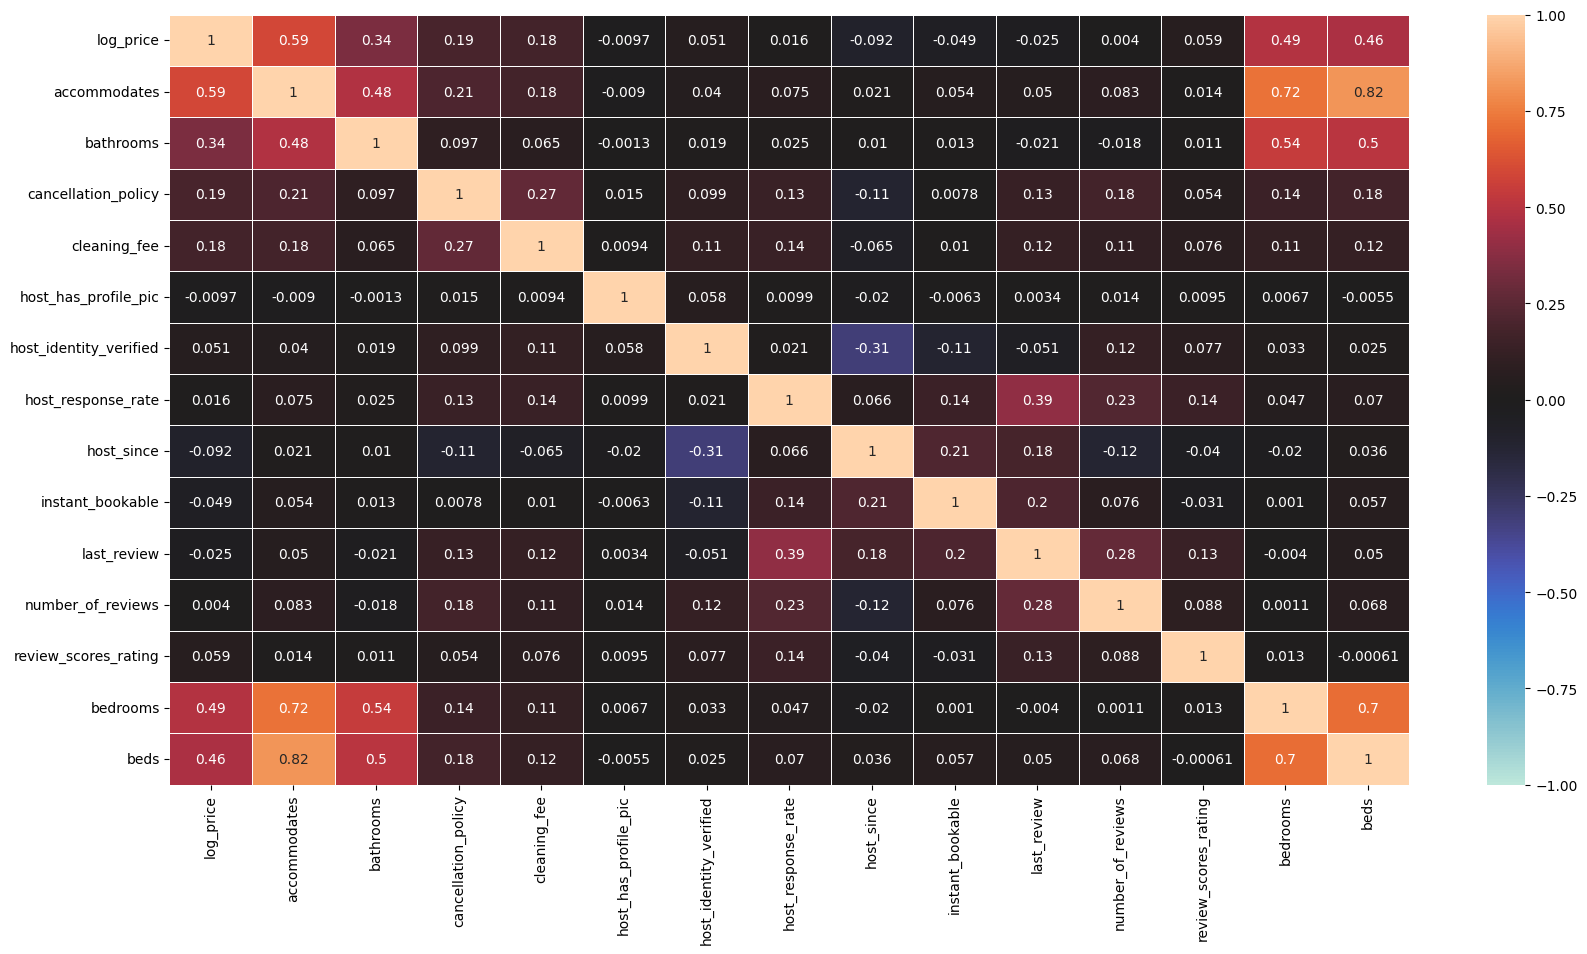

In [29]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(20,10))

sb.heatmap(df.iloc[:,0:15].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,
            )

plt.show()

# Separando el conjunto en training, validation y testing

In [30]:
df[['number_of_reviews']]

,number_of_reviews
id,
6901257,2
6304928,6
7919400,10
3808709,4
12422935,3
...,...
13862304,32
7935934,1
11829011,24


In [31]:
df = df.drop(columns=['number_of_reviews'],axis=1)

In [32]:
df.sample(frac=0.7, replace=False, random_state=17).to_csv("./my_train.csv")

In [33]:
# Datos de entrenamiento
train_data = df.sample(frac=0.7, replace=False, random_state=17)

# Datos de prueba
test_data = df.drop(labels=train_data.index, axis=0)

# datos de validación
validation_data = train_data.sample(frac=0.3, replace=False, random_state=17)
train_data = train_data.drop(labels=validation_data.index, axis=0)

test_labels = test_data['log_price']
validation_labels = validation_data['log_price']
train_labels = train_data['log_price']

validation_data = validation_data.drop(columns=['log_price'], axis=1)
train_data = train_data.drop(columns=['log_price'], axis=1)
test_data = test_data.drop(columns=['log_price'], axis=1)


In [34]:
train_data.shape[0]
#train_labels.shape[0]

24417

In [35]:
print(train_data.shape[0] + validation_data.shape[0] + test_data.shape[0])
print(train_labels.shape[0] + validation_labels.shape[0] + test_labels.shape[0])
print(df.shape)

49832
49832
(49832, 655)


## Regresión Lineal Simple

In [36]:
import statsmodels.api as sm

# Ordinary Least Square

model = sm.OLS(train_labels, train_data)
result = model.fit()
#result.summary()

- P>|t|: Esta notación que mustrar la probabilidad asociada al valor absoluto de la estadística t (|t|) para un coeficiente específico en un modelo de regresión. La estadística t se utiliza para evaluar la significancia estadística de un coeficiente en el modelo.

- Interpretación: La probabilidad P>|t| representa la probabilidad de observar un valor absoluto de la estadística t igual o más extremo que el valor observado, bajo la suposición de que el coeficiente en cuestión no tiene efecto en la variable de respuesta. 
**En otras palabras, es la probabilidad de que el coeficiente sea igual a cero (sin efecto) en el modelo**.

- Valores Pequeños: Un valor pequeño de P>|t| (generalmente menor que el nivel de significance α, como 0.05) sugiere que el coeficiente es estadísticamente significativo. Esto significa que hay evidencia suficiente para concluir que el coeficiente no es igual a cero y que tiene un efecto en la variable de respuesta.

- Valores Grandes: Un valor grande de P>|t| (mayor que α) sugiere que el coeficiente no es estadísticamente significativo. Esto implica que no hay evidencia suficiente para concluir que el coeficiente tiene un efecto significativo en la variable de respuesta, y podría considerarse como no relevante.

## Predecimos el conjunto de test

In [37]:
prediction = result.get_prediction(validation_data)
prediction.predicted_mean

array([5.29441836, 4.5964951 , 4.70044077, ..., 4.84852686, 3.98630403,
       5.05466484])

 Calculamos el estadístico R square para saber que tan bien funciona el modelo
$$ R^{2} = \frac{TSS − RSS}{RSS} = \frac{1−TSS}{TSS} $$

In [38]:
import sklearn.metrics
sklearn.metrics.r2_score(validation_labels,prediction.predicted_mean)


0.7106903730875164

Con un resultado del $60\%$ no parece que este haciendo buenas aproximaciones.

### Visualización de resultados

Text(0.5, 1.0, 'Linear Regresión Boxplot')

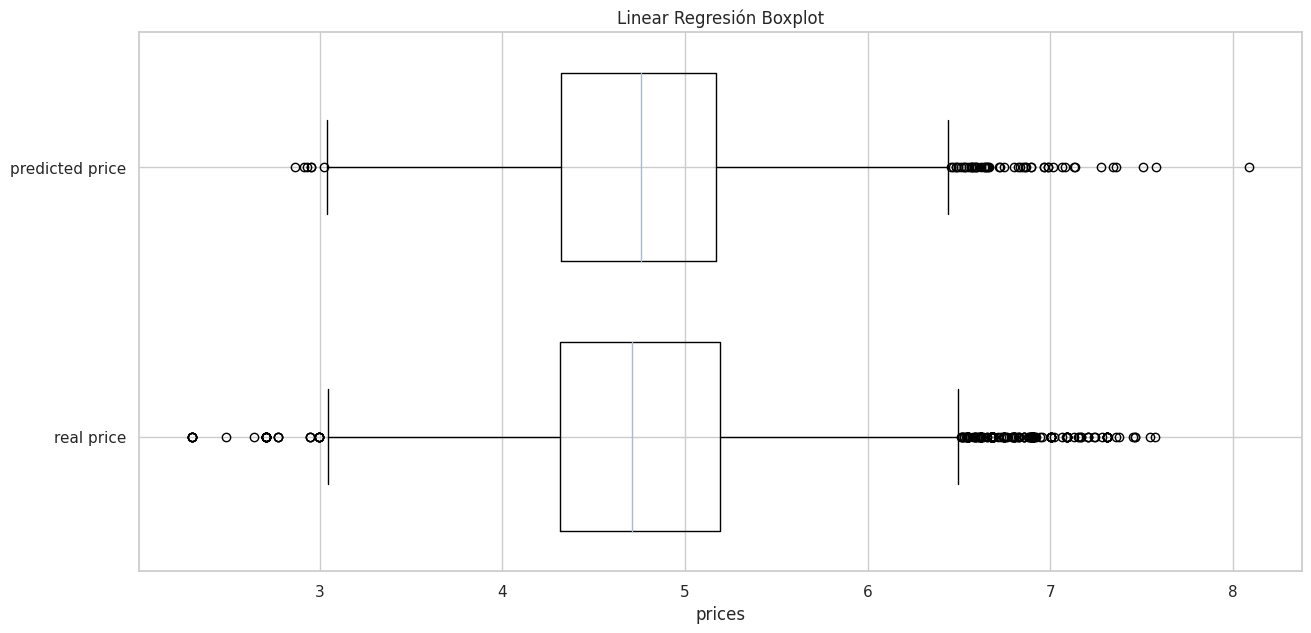

In [39]:
import seaborn as sb
sb.set_theme(style="whitegrid", palette="vlag")
fig, ax = plt.subplots(figsize=(15, 7))
# test_labels
ax.boxplot(
    x=[test_labels, prediction.predicted_mean],
    labels=["real price", "predicted price"],
    vert=False,
    widths=0.7
)
ax.set_xlabel("prices")
ax.set_title("Linear Regresión Boxplot")

### Método de Regularización : elastic net (Ridge & Lasso)

Intente hacer un tunning de los parámetros pero me resulto complejo. El valor de alpha deberia ser un vector con una penalización correspondiente a cada feature que nos parezca conveniente. El análisis es extensivo así que pasare directamente a Redes Neuronales.

In [40]:
#result = model.fit_regularized("elastic_net", alpha=1, L1_wt=0.5)
result.params

accommodates                  0.083994
bathrooms                     0.107648
cancellation_policy           0.004830
cleaning_fee                 -0.006392
host_has_profile_pic         -0.028921
                                ...   
neighbourhood_Woodlawn       -0.269645
neighbourhood_Woodley Park    0.602972
neighbourhood_Woodridge      -0.297859
neighbourhood_Woodside       -0.023711
neighbourhood_Wrigleyville    0.388185
Length: 654, dtype: float64

In [41]:
prediction = result.predict(validation_data)

In [42]:
import sklearn.metrics
sklearn.metrics.r2_score(validation_labels,prediction)

0.7106903730875164

## Regresión Lineal con Redes Neuronales

### Algoritmos de optimización

- **Adam** (Adaptive Moment Estimation): Adam es un algoritmo de optimización popular y ampliamente utilizado en una variedad de problemas. Suele funcionar bien en la mayoría de los casos y es una buena opción por defecto. Es eficaz para entrenar redes neuronales profundas y es resistente a la elección de hiperparámetros.

- **SGD** (Stochastic Gradient Descent): El Descenso de Gradiente Estocástico (SGD) es el algoritmo de optimización básico que es útil para empezar. Si tienes un conjunto de datos grande y un modelo simple, SGD puede ser suficiente. Sin embargo, puede ser más lento en converger que algunos de los algoritmos más avanzados.

- **RMSprop** (Root Mean Square Propagation): RMSprop es una variante de SGD que adapta las tasas de aprendizaje individualmente para cada parámetro. Es especialmente útil cuando se trata de problemas con gradientes dispersos o cuando las tasas de aprendizaje fijas no funcionan bien.

- **Adadelta**: Adadelta es otro algoritmo que se adapta a las tasas de aprendizaje automáticamente. Tiende a ser más robusto en términos de selección de tasas de aprendizaje, pero puede requerir más tiempo de ajuste fino.

- **Nadam** (Nesterov-accelerated Adaptive Moment Estimation): Nadam combina las ideas de Nesterov Momentum con Adam. Es útil cuando se desea acelerar la convergencia en comparación con Adam.

- **FTRL** (Follow-the-regularized-leader): FTRL es un algoritmo diseñado específicamente para la regresión lineal regularizada. Puede ser útil en problemas de regresión lineal con características dispersas.



In [43]:
train_data.iloc[:,0:3]

,accommodates,bathrooms,cancellation_policy
id,,,
8257637,2,1,2
20211603,6,2,1
15859741,3,1,0
13098099,1,1,1
5918634,2,1,2
...,...,...,...
15547793,4,1,1
3963003,4,1,2
20983197,2,1,2


In [44]:
train_data.shape

(24417, 654)

In [45]:
train_data.iloc[:,7].astype(int)

id
8257637     0
20211603    0
15859741    0
13098099    0
5918634     0
           ..
15547793    0
3963003     0
20983197    0
3923287     0
21093522    0
Name: host_since, Length: 24417, dtype: int64

Epoch 1/200
17/17 [==============================] - 2s 61ms/step - loss: 12.0527 - mae: 3.1477 - val_loss: 0.4679 - val_mae: 0.5136
Epoch 2/200
17/17 [==============================] - 1s 41ms/step - loss: 0.4002 - mae: 0.4786 - val_loss: 0.3515 - val_mae: 0.4498
Epoch 3/200
17/17 [==============================] - 1s 42ms/step - loss: 0.3230 - mae: 0.4358 - val_loss: 0.3121 - val_mae: 0.4282
Epoch 4/200
17/17 [==============================] - 1s 40ms/step - loss: 0.2915 - mae: 0.4168 - val_loss: 0.2850 - val_mae: 0.4122
Epoch 5/200
17/17 [==============================] - 1s 40ms/step - loss: 0.2747 - mae: 0.4055 - val_loss: 0.2720 - val_mae: 0.4028
Epoch 6/200
17/17 [==============================] - 1s 43ms/step - loss: 0.2627 - mae: 0.3968 - val_loss: 0.2638 - val_mae: 0.3965
Epoch 7/200
17/17 [==============================] - 1s 40ms/step - loss: 0.2536 - mae: 0.3894 - val_loss: 0.2531 - val_mae: 0.3879
Epoch 8/200
17/17 [==============================] - 1s 40ms/step - loss: 0

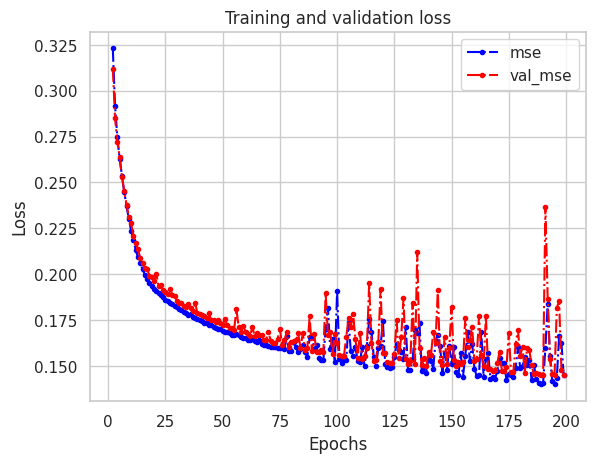

In [56]:
from tensorflow import keras
from keras import layers
from keras import initializers
from keras import optimizers

model = keras.Sequential([
    layers.Dense(train_data.shape[1],activation="relu",kernel_initializer=initializers.RandomNormal,input_shape=(train_data.shape[1],)),
    layers.Dense(200,activation="relu",kernel_initializer=initializers.RandomNormal),
    layers.Dense(100,activation="relu",kernel_initializer=initializers.RandomNormal),
    layers.Dense(20,activation="relu",kernel_initializer=initializers.RandomNormal),
    layers.Dense(100,activation="relu",kernel_initializer=initializers.RandomNormal),
    layers.Dense(1,activation="linear"),
])

op = optimizers.SGD()

model.compile(optimizer=op,
              loss="mse",
              metrics=["mae"]
              )

history = model.fit(
    x=train_data,
    y=train_labels,
    epochs=200,
    batch_size=1500,
    validation_data=(validation_data,validation_labels),
)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"][2:]
mae_values = history_dict["mae"]
loss_validation_values = history_dict["val_loss"][2:]
mae_validation_values = history_dict["val_mae"]
epochs = range(2, len(loss_values) + 2)
plt.plot(epochs, loss_values, "b.-.", label="mse")
#plt.plot(epochs, mae_values, "b", label="mae")
plt.plot(epochs, loss_validation_values, "r.-.", label="val_mse")
#plt.plot(epochs, mae_validation_values, "r", label="val_mae")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [57]:
prediction = model.predict(test_data)
prediction

468/468 [==============================] - 1s 2ms/step


array([[4.934246 ],
       [4.7130814],
       [5.1368527],
       ...,
       [4.8344173],
       [4.1267476],
       [4.6084   ]], dtype=float32)

Métrica $ R^{2} $

In [58]:
import sklearn.metrics
prediction = model.predict(test_data)
sklearn.metrics.r2_score(test_labels.to_numpy().reshape(-1),prediction)

468/468 [==============================] - 1s 2ms/step


0.6902760319130481